In [1]:
import pandas as pd

passengers = pd.read_csv('data.csv')
passengers.head()

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


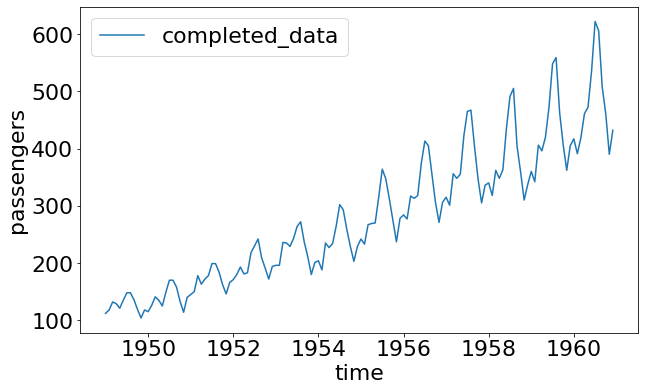

In [5]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

sns.lineplot(x='time', y='passengers', data = passengers, label='completed_data')

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(passengers)

StandardScaler()

In [7]:
scaled_data = sc.transform(passengers)
x = scaled_data[:,0]
y = scaled_data[:,1]

Text(0.5, 0, 'Date')

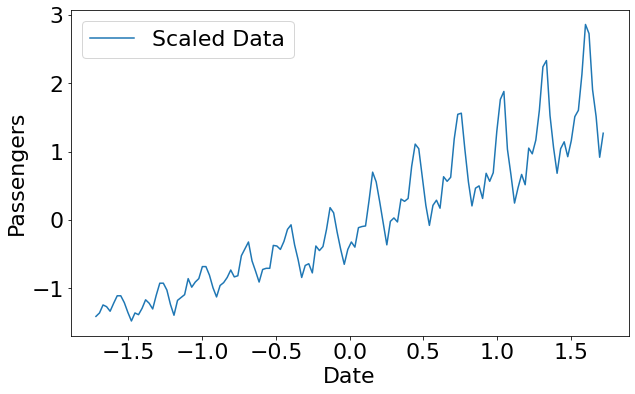

In [18]:
import matplotlib.pyplot as plt

sns.lineplot(x = x, y = y, label = 'Scaled Data')
plt.ylabel('Passengers')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

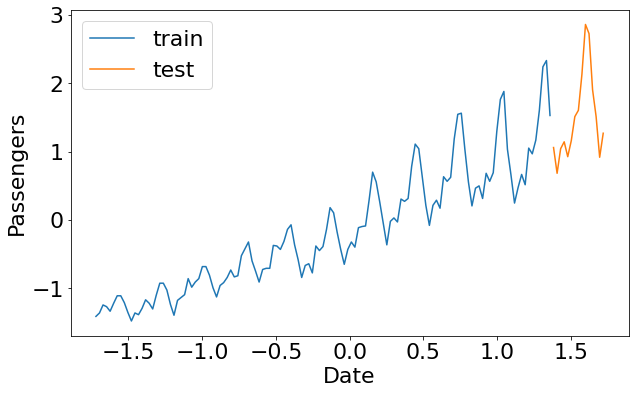

In [20]:
train_size = int(len(passengers) * 0.9)
test_size = len(passengers) - train_size

x_train = x[0:train_size]
y_train = y[0:train_size]

x_test = x[train_size:len(passengers)]
y_test = y[train_size:len(passengers)]

sns.lineplot(x = x_train, y = y_train, label = 'train')
sns.lineplot(x = x_test, y = y_test, label = 'test')
plt.ylabel('Passengers')
plt.xlabel('Date')

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(
    1, 
    input_dim = 1,     
    kernel_initializer='Ones', # Weights
    activation='linear',
    use_bias=False))

model.compile(loss='mean_squared_error', optimizer='adam')

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(x_train, y_train)

5/5 [==============================] - 0s 1ms/step - loss: 0.1285


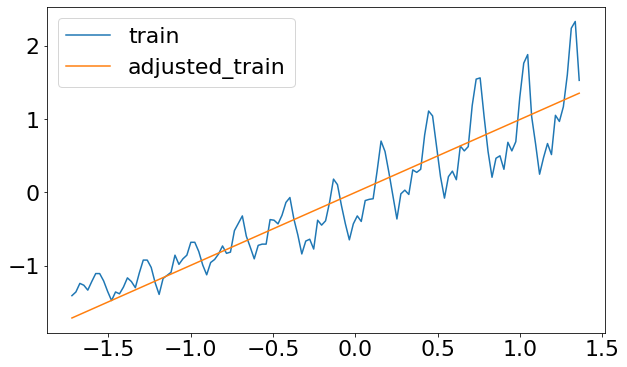

In [42]:
y_predict = model.predict(x_train)

sns.lineplot(x = x_train, y=y_train, label = 'train')
sns.lineplot(x = x_train, y=y_predict[:,0], label = 'adjusted_train')



In [57]:
d = {'time': x_train, 'passengers': y_predict[:, 0]}

In [58]:
results = pd.DataFrame(data = d)
results.head()

,time,passengers
0,-1.720064,-1.712162
1,-1.696007,-1.688216
2,-1.671950,-1.664270
3,-1.647894,-1.640323
4,-1.623837,-1.616377


In [63]:
transf_results = sc.inverse_transform(results)
transf_results = pd.DataFrame(transf_results)
transf_results.columns = ['time', 'passengers']

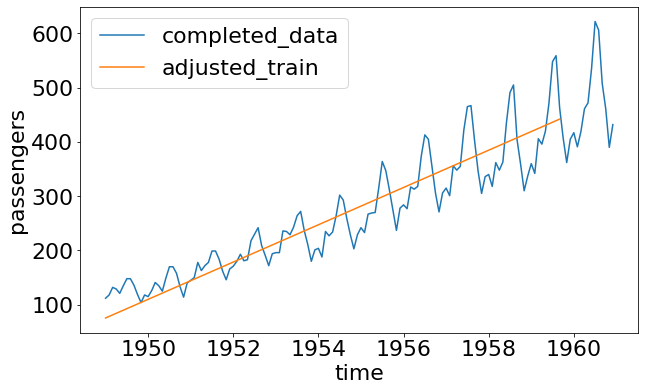

In [64]:
sns.lineplot(x='time', y='passengers', data=passengers, label='completed_data')
sns.lineplot(x='time', y='passengers', data=transf_results, label='adjusted_train')

In [65]:
y_predict_test = model.predict(x_test)
d = {'time' : x_test, 'passengers': y_predict_test[:,0] }

test_results = pd.DataFrame(data=d)

In [69]:
transf_results_test = sc.inverse_transform(test_results)
transf_results_test = pd.DataFrame(trans_results_test)
transf_results_test.columns = ['time', 'passengers']

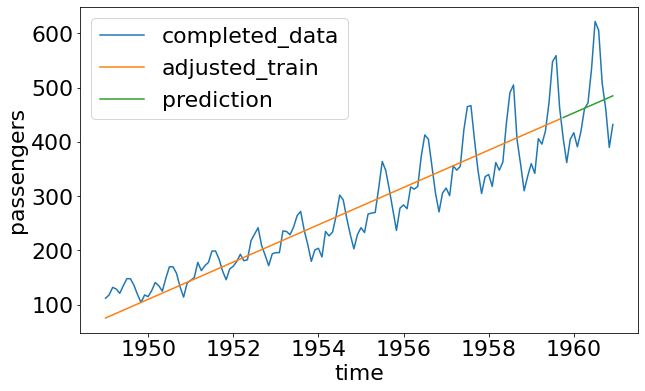

In [70]:
sns.lineplot(x='time', y='passengers', data=passengers, label='completed_data')
sns.lineplot(x='time', y='passengers', data=transf_results, label='adjusted_train')
sns.lineplot(x='time', y='passengers', data=transf_results_test, label='prediction')